In [8]:
%matplotlib inline

import json
import numpy as np
import pandas as pd

!conda install scikit-learn --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/bernease/miniconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37hecd8cb5_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.17.0-py_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-10.0.0-h28b9765_0
  scikit-learn       pkgs/main/osx-64::scikit-learn-0.23.2-py37h959d312_0
  scipy              pkgs/main/osx-64::scipy-1.5.2-py37h912ce22_0
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.1.0-pyh5ca1d4c_0

The following packages will be UPDATED:

  certifi            pkgs/main/osx-64::certifi-2020.6.20-p~ --> pkgs/main/noarch::certi

In [6]:
features = json.load(open("lemon_remix_features.txt", "r"))

In [3]:
analysis = json.load(open("lemon_remix_analysis.txt", "r"))

In [4]:
for key in analysis.keys():
    print(f"\nInfo:\t{key}: {len(analysis[key])}")
    if isinstance(analysis[key], list):
        print(f"Sample:\t{analysis[key][0]}")
    elif isinstance(analysis[key], dict):
        print(f"Keys:\t{analysis[key].keys()}")


Info:	meta: 7
Keys:	dict_keys(['analyzer_version', 'platform', 'detailed_status', 'status_code', 'timestamp', 'analysis_time', 'input_process'])

Info:	track: 26
Keys:	dict_keys(['num_samples', 'duration', 'sample_md5', 'offset_seconds', 'window_seconds', 'analysis_sample_rate', 'analysis_channels', 'end_of_fade_in', 'start_of_fade_out', 'loudness', 'tempo', 'tempo_confidence', 'time_signature', 'time_signature_confidence', 'key', 'key_confidence', 'mode', 'mode_confidence', 'codestring', 'code_version', 'echoprintstring', 'echoprint_version', 'synchstring', 'synch_version', 'rhythmstring', 'rhythm_version'])

Info:	bars: 175
Sample:	{'start': 0.21587, 'duration': 1.24391, 'confidence': 0.339}

Info:	beats: 702
Sample:	{'start': 0.21587, 'duration': 0.30898, 'confidence': 0.188}

Info:	sections: 9
Sample:	{'start': 0.0, 'duration': 10.77656, 'confidence': 1.0, 'loudness': -9.604, 'tempo': 192.445, 'tempo_confidence': 0.375, 'key': 0, 'key_confidence': 0.049, 'mode': 0, 'mode_confidenc

In [26]:
# List of all bars
[bar["start"] for bar in analysis["bars"]]

[0.21587,
 1.45977,
 2.71879,
 4.01234,
 5.33489,
 6.66902,
 7.98411,
 9.23521,
 10.46946,
 11.71079,
 12.97498,
 14.24109,
 15.51132,
 16.76831,
 18.02605,
 19.2898,
 20.55247,
 21.81516,
 23.08171,
 24.34666,
 25.61027,
 26.86376,
 28.12323,
 29.3833,
 30.65032,
 31.91769,
 33.18209,
 34.45115,
 35.71437,
 36.97664,
 38.23938,
 39.50085,
 40.76289,
 42.02775,
 43.28532,
 44.55038,
 45.81735,
 47.07921,
 48.3359,
 49.60287,
 50.86351,
 52.12474,
 53.39762,
 54.66627,
 55.92664,
 57.1903,
 58.46066,
 59.77505,
 61.11471,
 62.40264,
 63.35682,
 64.62729,
 65.887,
 67.14463,
 68.40228,
 69.66563,
 70.92753,
 72.18581,
 73.45255,
 74.72219,
 75.98188,
 77.2447,
 78.50604,
 79.79327,
 81.04992,
 82.29265,
 83.55892,
 84.82501,
 86.098,
 87.35947,
 88.61728,
 89.88277,
 91.14106,
 92.40268,
 93.66939,
 94.94022,
 96.20042,
 97.45744,
 98.71934,
 99.98343,
 101.24609,
 102.51648,
 103.78279,
 105.04216,
 106.30339,
 107.56816,
 108.82761,
 110.08446,
 111.34804,
 112.60886,
 113.87751,
 115.

In [27]:
[beat["start"] for beat in analysis["beats"]]

[0.21587,
 0.52485,
 0.83733,
 1.14926,
 1.45977,
 1.77384,
 2.08566,
 2.40334,
 2.71879,
 3.03519,
 3.35787,
 3.68254,
 4.01234,
 4.33953,
 4.66984,
 5.00184,
 5.33489,
 5.66529,
 5.99879,
 6.33164,
 6.66902,
 7.00313,
 7.33456,
 7.65993,
 7.98411,
 8.30594,
 8.62139,
 8.93018,
 9.23521,
 9.54219,
 9.85085,
 10.16318,
 10.46946,
 10.77656,
 11.08562,
 11.39865,
 11.71079,
 12.02775,
 12.34067,
 12.6567,
 12.97498,
 13.29378,
 13.60912,
 13.92614,
 14.24109,
 14.55915,
 14.87603,
 15.19455,
 15.51132,
 15.82748,
 16.14074,
 16.45511,
 16.76831,
 17.08462,
 17.39607,
 17.70892,
 18.02605,
 18.34487,
 18.66053,
 18.97589,
 19.2898,
 19.60684,
 19.92244,
 20.23774,
 20.55247,
 20.86778,
 21.18251,
 21.49869,
 21.81516,
 22.13393,
 22.44842,
 22.76378,
 23.08171,
 23.40079,
 23.71646,
 24.03127,
 24.34666,
 24.66376,
 24.98002,
 25.29542,
 25.61027,
 25.92626,
 26.23884,
 26.54972,
 26.86376,
 27.17876,
 27.49385,
 27.80931,
 28.12323,
 28.44017,
 28.75642,
 29.06977,
 29.3833,
 29.69815,


In [34]:
segments = []
for segment in analysis["segments"]:
    if segment["confidence"] > 0.9:
        segments.append(segment["start"])

segments

[0.29823,
 0.93519,
 1.88476,
 2.10063,
 2.46603,
 8.48721,
 9.42685,
 10.10444,
 10.73905,
 10.92998,
 11.67937,
 11.83125,
 12.61995,
 13.25664,
 13.56735,
 13.89655,
 14.52744,
 14.99429,
 15.15107,
 15.47442,
 15.77125,
 16.89837,
 17.02639,
 17.67615,
 18.31592,
 18.6117,
 19.26249,
 19.55238,
 20.20141,
 21.78449,
 21.96807,
 22.07528,
 22.41673,
 23.3619,
 23.6849,
 24.62571,
 25.25751,
 25.5473,
 25.84399,
 26.10562,
 26.83823,
 27.12236,
 27.62009,
 27.78263,
 28.08902,
 28.4166,
 29.64118,
 30.30789,
 30.59782,
 30.81968,
 30.94794,
 31.22503,
 32.18862,
 32.52522,
 32.83297,
 33.15728,
 33.47329,
 33.78454,
 34.1044,
 34.72907,
 34.98662,
 35.36404,
 35.68367,
 35.99628,
 36.3015,
 36.63048,
 37.07533,
 37.23828,
 37.54635,
 38.17828,
 38.5278,
 39.76376,
 40.08395,
 40.72136,
 41.34476,
 41.9932,
 42.29755,
 42.60875,
 43.24694,
 44.52354,
 44.8376,
 45.13478,
 45.77315,
 46.08612,
 46.2659,
 47.32567,
 47.9898,
 48.28408,
 48.93011,
 49.8722,
 50.18757,
 50.82667,
 51.4239

In [5]:
segments = []
for segment in analysis["segments"]:
    if segment["confidence"] > 0.9:
        segments.append(segment)
segments_conf90 = segments

thres = np.percentile(np.array(segments), 75)
segments = []
for segment in analysis["segments"]:
    if segment["timbre"][0] >= thres:
        segments.append(segment["start"])
        
segments

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [167]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [6]:
from sklearn.cluster import KMeans

X = np.array([segment["pitches"] for segment in analysis["segments"]])
kmeans = KMeans(n_clusters=12, random_state=0).fit(segments_2d)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

segments_2d["y"] = kmeans.labels_

ModuleNotFoundError: No module named 'sklearn'

In [327]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=0)

segments_2d = pd.DataFrame(tsne.fit_transform(X), columns=["x1", "x2"])
#segments_2d["y"] = kmeans.labels_

In [1]:
sns.scatterplot(x="x1", y="x2",
                #hue=segments_2d["y"].to_list(),
                data=segments_2d,
                palette=sns.color_palette("bright", n_colors=12))

# Had to alter call to hue out of laziness for upgrading matplotlib:
# https://stackoverflow.com/questions/63443583/seaborn-valueerror-zero-size-array-to-reduction-operation-minimum-which-has-no

NameError: name 'sns' is not defined

<AxesSubplot:>

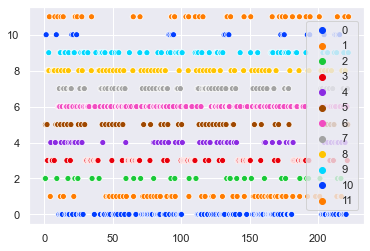

In [325]:
sns.scatterplot(x=start_times,
               y=kmeans.labels_,
               hue=kmeans.labels_,
               palette=sns.color_palette("bright", n_colors=12))

In [295]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([segment["pitches"] for segment in analysis["segments"]])
aggcluster = AgglomerativeClustering(distance_threshold=None, n_clusters=10).fit(X)
print(aggcluster.labels_)

[1 4 1 1 3 1 8 1 6 3 5 7 7 7 0 7 1 9 9 4 0 0 0 0 0 0 0 7 1 4 6 8 1 6 6 2 7
 2 2 5 2 3 2 0 5 9 0 6 5 1 4 7 5 2 5 3 2 9 3 6 4 4 5 0 2 2 5 2 3 2 0 5 5 6
 1 4 5 0 5 2 5 3 4 0 3 6 3 4 8 2 5 5 2 8 2 9 4 4 1 1 1 4 4 2 5 8 2 1 1 1 2
 4 7 5 2 5 3 2 0 5 5 6 4 4 7 2 2 5 2 3 4 0 3 6 2 0 0 0 0 2 0 0 2 2 0 0 0 2
 0 0 0 0 0 0 7 1 1 1 0 0 0 0 5 2 0 0 0 2 0 0 0 0 0 0 7 1 1 1 7 2 2 5 3 4 0
 3 6 4 4 7 5 2 5 2 3 5 4 0 3 6 9 7 5 2 2 3 9 5 5 6 9 7 5 2 2 2 3 4 0 3 6 9
 7 5 5 3 2 0 5 5 6 9 7 0 2 2 5 2 3 3 0 3 6 9 7 2 2 5 3 2 0 3 6 9 7 2 2 5 3
 2 4 1 2 9 0 0 0 0 0 5 2 2 0 0 0 0 0 0 0 0 0 7 1 4 9 1 0 0 0 0 0 5 2 2 0 0
 0 0 0 0 0 0 7 1 1 1 7 2 2 5 3 9 5 5 6 9 7 5 2 5 3 2 0 5 4 5 5 9 7 2 2 5 3
 2 0 5 5 6 9 7 5 5 3 2 4 1 2 9 4 7 5 2 5 3 2 9 5 5 5 5 4 4 7 5 2 5 3 5 3 9
 3 6 5 4 7 2 2 3 3 2 0 5 5 6 5 7 4 7 5 2 2 2 3 9 0 3 6 4 4 8 8 2 5 8 2 9 1
 4 1 2 9 8 5 2 2 8 3 1 4 1 9 4 5 0 5 5 3 2 0 3 5 3 9 4 7 5 2 5 3 5 2 0 0 5
 6 0 4 0 0 0 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 7 1 2 9 1 0 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 7 4 1 1 7 

In [245]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [246]:
plot_dendrogram(aggcluster, truncate_mode='level', p=5)

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [247]:
start_times = [segment["start"] for segment in analysis["segments"]]
ones = np.ones(len(analysis["segments"]))

<AxesSubplot:>

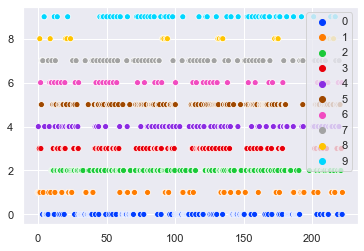

In [296]:
sns.scatterplot(x=start_times,
               y=aggcluster.labels_,
               hue=aggcluster.labels_,
               palette=sns.color_palette("bright", n_colors=10))

In [165]:
X_2d

array([[ 4.06732321e+00, -9.07236290e+00],
       [ 2.68680038e+01,  2.00367260e+01],
       [-9.03962553e-01, -9.37637711e+00],
       [ 1.99787796e+00,  1.35876507e-01],
       [ 2.72912312e+01,  2.03976364e+01],
       [ 2.92928333e+01,  1.51318331e+01],
       [ 1.91546650e+01,  9.58420694e-01],
       [ 4.75294781e+00, -5.93417120e+00],
       [-1.73681030e+01, -6.91511488e+00],
       [ 1.22076349e+01, -7.33182144e+00],
       [-1.01264954e+01, -2.29301167e+01],
       [ 6.71555948e+00, -6.41673088e+00],
       [ 1.30917227e+00, -4.14730263e+00],
       [-3.55008812e+01, -1.14978333e+01],
       [ 1.38663340e+01,  1.48268108e+01],
       [ 1.74134789e+01,  3.21149141e-01],
       [ 9.48746979e-01, -7.43676329e+00],
       [-1.41504157e+00,  1.00567970e+01],
       [ 5.36992216e+00, -9.19527888e-01],
       [ 1.95457325e+01,  2.74966955e+00],
       [ 1.22206345e+01, -6.70761442e+00],
       [-1.40075960e+01, -1.69748020e+01],
       [-3.68041086e+00,  6.06759977e+00],
       [ 3.

In [174]:
analysis["sections"]

[{'start': 0.0,
  'duration': 10.77656,
  'confidence': 1.0,
  'loudness': -9.604,
  'tempo': 192.445,
  'tempo_confidence': 0.375,
  'key': 0,
  'key_confidence': 0.049,
  'mode': 0,
  'mode_confidence': 0.479,
  'time_signature': 4,
  'time_signature_confidence': 0.969},
 {'start': 10.77656,
  'duration': 21.77215,
  'confidence': 0.477,
  'loudness': -5.928,
  'tempo': 190.152,
  'tempo_confidence': 0.689,
  'key': 1,
  'key_confidence': 0.677,
  'mode': 1,
  'mode_confidence': 0.466,
  'time_signature': 4,
  'time_signature_confidence': 1.0},
 {'start': 32.54871,
  'duration': 8.53101,
  'confidence': 0.256,
  'loudness': -5.658,
  'tempo': 189.967,
  'tempo_confidence': 0.773,
  'key': 8,
  'key_confidence': 0.509,
  'mode': 1,
  'mode_confidence': 0.622,
  'time_signature': 4,
  'time_signature_confidence': 1.0},
 {'start': 41.07972,
  'duration': 20.03499,
  'confidence': 0.172,
  'loudness': -5.874,
  'tempo': 189.751,
  'tempo_confidence': 0.751,
  'key': 1,
  'key_confidence'

In [175]:
np.array([section["duration"] for section in analysis["sections"]]).sum()

226.10667

(array([0.00721649, 0.01237113, 0.02989691, 0.05154639, 0.07319588,
        0.08865979, 0.10618557, 0.12268041, 0.14226804, 0.16597938,
        0.19690722, 0.23917526, 0.27628866, 0.32886598, 0.3742268 ,
        0.40618557, 0.46597938, 0.52680412, 0.5814433 , 1.        ]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 [<matplotlib.patches.Polygon at 0x7ff55ec397f0>])

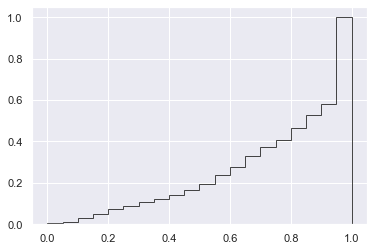

In [205]:
# Confidence plots
x = [segment["confidence"] for segment in analysis["segments"]]
plt.hist(x, cumulative=True, density=True, bins=20,
         histtype='step', alpha=0.8, color='k')

(array([0.01142857, 0.03428571, 0.04571429, 0.08      , 0.16      ,
        0.2       , 0.25142857, 0.34285714, 0.42285714, 0.54857143,
        0.60571429, 0.65714286, 0.72571429, 0.81142857, 0.85714286,
        0.90857143, 0.94285714, 0.96      , 0.98857143, 1.        ]),
 array([0.099  , 0.14065, 0.1823 , 0.22395, 0.2656 , 0.30725, 0.3489 ,
        0.39055, 0.4322 , 0.47385, 0.5155 , 0.55715, 0.5988 , 0.64045,
        0.6821 , 0.72375, 0.7654 , 0.80705, 0.8487 , 0.89035, 0.932  ]),
 [<matplotlib.patches.Polygon at 0x7ff55e605a90>])

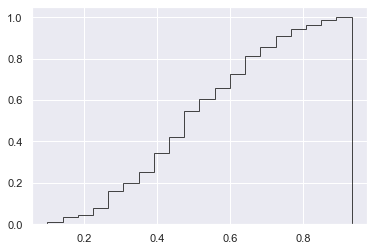

In [206]:
# Confidence plots
x = [segment["confidence"] for segment in analysis["bars"]]
plt.hist(x, cumulative=True, density=True, bins=20,
         histtype='step', alpha=0.8, color='k')

(array([0.02421652, 0.02564103, 0.03133903, 0.03561254, 0.03846154,
        0.04273504, 0.05270655, 0.05698006, 0.06695157, 0.08689459,
        0.10826211, 0.15384615, 0.22507123, 0.33618234, 0.45441595,
        0.64529915, 0.77777778, 0.88034188, 0.97720798, 1.        ]),
 array([0.    , 0.0468, 0.0936, 0.1404, 0.1872, 0.234 , 0.2808, 0.3276,
        0.3744, 0.4212, 0.468 , 0.5148, 0.5616, 0.6084, 0.6552, 0.702 ,
        0.7488, 0.7956, 0.8424, 0.8892, 0.936 ]),
 [<matplotlib.patches.Polygon at 0x7ff55ebb15e0>])

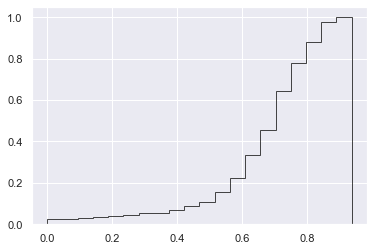

In [207]:
# Confidence plots
x = [segment["confidence"] for segment in analysis["beats"]]
plt.hist(x, cumulative=True, density=True, bins=20,
         histtype='step', alpha=0.8, color='k')

# These seem to have an interesting pattern in confidence.
# Try out beats with confidence score > 0.7

In [209]:
beats_conf70 = []
for segment in analysis["beats"]:
    if segment["confidence"] > 0.7:
        beats_conf70.append(segment["start"])
beats_conf70

# This was not as useful as I would have liked. Let's go back to clusters.

[13.60912,
 13.92614,
 14.55915,
 15.19455,
 15.51132,
 15.82748,
 17.08462,
 17.39607,
 17.70892,
 18.34487,
 18.66053,
 18.97589,
 19.2898,
 19.60684,
 20.23774,
 22.13393,
 22.44842,
 22.76378,
 23.40079,
 23.71646,
 24.03127,
 24.34666,
 24.66376,
 24.98002,
 25.29542,
 25.61027,
 25.92626,
 27.17876,
 27.49385,
 27.80931,
 28.12323,
 28.44017,
 29.69815,
 30.65032,
 30.96756,
 31.2841,
 31.60196,
 32.23359,
 32.54871,
 32.86392,
 33.18209,
 33.50143,
 33.81789,
 34.13523,
 34.45115,
 34.76794,
 35.08389,
 35.39869,
 35.71437,
 36.0318,
 36.34635,
 36.66178,
 36.97664,
 37.29209,
 37.60813,
 37.92389,
 38.23938,
 38.55573,
 38.87124,
 40.13053,
 40.76289,
 41.07972,
 41.39633,
 41.71212,
 42.02775,
 42.34205,
 42.65703,
 42.97068,
 43.28532,
 43.60123,
 44.55038,
 44.86603,
 45.18263,
 45.50012,
 45.81735,
 46.13579,
 46.45021,
 46.76467,
 48.02187,
 48.3359,
 48.65409,
 48.97093,
 49.287,
 49.60287,
 49.91854,
 50.2346,
 50.5493,
 50.86351,
 51.17931,
 51.49434,
 51.81035,
 52.124

<AxesSubplot:xlabel='x1', ylabel='x2'>

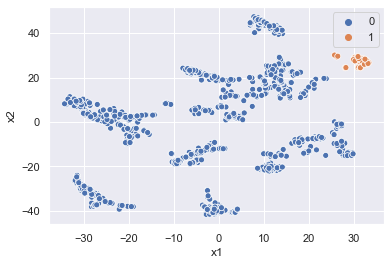

In [346]:
hue = (segments_2d["y"]==6).astype(int)
size = np.array([segment["loudness_max"] for segment in analysis["segments"]])
sns.scatterplot("x1", "x2", hue=hue.to_list(), markers=size, data=segments_2d)

In [344]:
segment_conf = np.array([segment["confidence"] for segment in analysis["segments"]])
segment_loudmax = np.array([segment["loudness_max"] for segment in analysis["segments"]])
conf_starts = np.array(start_times)

for label in set(aggcluster.labels_):
    print(label, segment_loudmax[aggcluster.labels_==label].mean(), segment_loudmax[aggcluster.labels_==label].std())
    #print(f"var aggcluster_{label} = " +
    #      f"{list(conf_starts[(aggcluster.labels_==label)])}")
          
          

0 -5.803808612440192 3.6037146733092498
1 -7.450608695652174 5.975554773147084
2 -8.087251533742332 5.4049930930116625
3 -6.245378048780489 3.1741474470502635
4 -10.489749999999999 7.723901805470048
5 -5.845155172413793 3.4067209795114364
6 -2.6131904761904767 2.236786739074553
7 -5.601777777777777 2.261114259972067
8 -5.032380952380953 1.9165762001720048
9 -7.141945454545455 3.1618768443509904


In [340]:
segment_conf[aggcluster.labels_==label].std()

0.24961159076984357

In [294]:
analysis["segments"]

[{'start': 0.0,
  'duration': 0.20925,
  'confidence': 0.0,
  'loudness_start': -28.632,
  'loudness_max_time': 0.00763,
  'loudness_max': -28.27,
  'loudness_end': 0.0,
  'pitches': [0.036,
   0.046,
   0.139,
   0.173,
   0.04,
   0.064,
   0.264,
   0.976,
   1.0,
   0.128,
   0.051,
   0.038],
  'timbre': [30.357,
   -315.435,
   -117.249,
   -53.863,
   24.189,
   -56.191,
   9.228,
   26.634,
   -11.761,
   -10.594,
   -15.243,
   -9.243]},
 {'start': 0.20925,
  'duration': 0.08898,
  'confidence': 0.595,
  'loudness_start': -37.098,
  'loudness_max_time': 0.00735,
  'loudness_max': -27.666,
  'loudness_end': 0.0,
  'pitches': [0.041,
   0.015,
   0.017,
   0.127,
   0.141,
   0.085,
   0.629,
   0.629,
   1.0,
   0.996,
   0.329,
   0.004],
  'timbre': [31.238,
   -322.401,
   -106.35,
   -70.595,
   20.996,
   -66.819,
   13.37,
   6.984,
   -10.683,
   -11.723,
   -1.599,
   -10.191]},
 {'start': 0.29823,
  'duration': 0.33447,
  'confidence': 1.0,
  'loudness_start': -29.131,